<a href="https://colab.research.google.com/github/gabosantos/2324CS280UPD/blob/main/CS_280_Lesson_4_Support_Vectors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview


In this lesson you will learn:
*   What are support vector machines
*   How to use SVM for classification tasks
*   How to use SVM for non-linear classification problems

# Concepts

## Support Vector Machines


<font color="#9980FA">Support Vector Machines (SVMs)</font> are robust Machine Learning models that can be used for nonlinear classification, regression, and even outlier detection. They are particularly well-suited for classification of complex small- or medium-sized datasets [HML].

SVM works by creating decision boundaries based on support vectors. <font color="#9980FA">Support vectors</font> are points or samples on the data set that "support" the decision boundary (hyperplanes) that maximally separates the data points of different classes. These points have a direct impact on the position and orientation of the hyperplane.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1ZOmzRvTkn3okWwEmHXO1ToltEMFQO-k6" height="360"/></td></tr></table>
<center><small>[Kumar]</small></center>

<br>

<font color="#9980FA">Decision boundaries</font> with large margins tend to have a lower generalization error, whereas models with small margins are more prone to overfitting. So an SVM classifier finds the hyperplane that maximally separates the support vectors of each class [Kumar].








The decision boundary (or boundaries for multiclass problems) is similar to the previous linear classifiers we've discussed:

$\textbf{w}^T\textbf{x}+b=w_1 x_1 + \cdots + w_n x_n + b$

In SVM, our goal is to optimize $\textbf{w}$ and $b$ that would <font color="#9980FA">maximize the margins</font> between the classes. There are two types of margins in SVM. The hard margin that restricts misclassifications, and the soft margin that allows some trade-offs.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1IDDp2USIkELJ0MSINOMnajV6zLKwp6hQ" height="360"/></td></tr></table>
<center><small>From Oreilly Library</small></center>

<br>

To find the <font color="#9980FA">hard margin</font>:
<br>

$\begin{align*}
\text{Minimize} \quad & \frac{1}{2} \mathbf{w}^T \cdot \mathbf{w} \\
\text{Subject to} \quad & t^{(i)} \left( \mathbf{w}^T \cdot \mathbf{x}^{(i)} + b \right) \geq 1 \quad \text{for } i = 1, 2, \ldots, m
\end{align*}$

where
* $\mathbf{w}$ represents the weight vector.
* $m$ is the number of training examples.
* $t^{(i)}$ is the target value for the ith training example.
* $x^{(i)}$ is the feature vector for the ith training example.
* $b$ is the bias term.

Note here that we are actually minimizing $\frac{1}{2}\|{\mathbf{w}}\|^2$ since it has a nice, simple derivative [HML].

<br>

To find the <font color="#9980FA">soft margin</font>, we introduce a slack variable $\xi$. The <font color="#9980FA">slack variable</font> does what it says: it cuts us some slack and allows some misclassified samples to go over the margin:

$\begin{align*}
\text{Minimize} \quad & \frac{1}{2} \mathbf{w}^T \cdot \mathbf{w} + C \sum_{i=1}^{m} \left[ \xi^{(i)} + \xi^{(i)*} \right] \\
\text{Subject to} \quad & t^{(i)} \left( \mathbf{w}^T \cdot \mathbf{x}^{(i)} + b \right) \geq 1 - \xi^{(i)} \\
& \xi^{(i)}, \xi^{(i)*} \geq 0 \quad \text{for } i = 1, 2, \ldots, m
\end{align*}$

Obviously, there are two competing objectives here: make the slack variables as small as possible to reduce the margin violations, and make $\textbf{w}$ as small as possible to increase the margin. This is where the $C$ regularization parameter: it allows us to define the trade-off between these two objectives [HML].

The <font color="#9980FA">regularization parameter `C`</font> affects the margin size. The larger the value of C, the smaller the margin. As a regularization parameter, it tells the algorithm how much to avoid misclassifying each training sample [Sampaio]. Other hyperparameters such as the <font color="#9980FA">`kernel`</font> and <font color="#9980FA">`gamma`</font> will be discussed on the next section.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1n6Vl3x9J81n192Pm7_egg5rf63nKQcN0" height="360"/></td></tr></table>
<center><small>[Sampaio]</small></center>


The hard margin and soft margin problems are both convex quadratic optimization problems with linear constraints, also known as <font color="#9980FA">Quadratic Programming (QP) problems</font>. It is possible to express this primal problem into a closely related dual problem, which is faster to solve when the number of training instances is smaller than the number of features. And luckily, the SVM problem happens to meet the conditions for the conditions for the primal and dual problems to have the same solutions [HML].

The <font color="#9980FA">dual form</font> of the linear SVM objective can then be expressed as:

$\begin{align*}
\text{Minimize} \quad & \frac{1}{2} \sum_{i=1}^{m} \sum_{j=1}^{m} \alpha^{(i)} \alpha^{(j)} t^{(i)} t^{(j)} \mathbf{x}^{(i)T} \cdot \mathbf{x}^{(j)} - \sum_{i=1}^{m} \alpha^{(i)}\\
\text{Subject to} \quad & \alpha^{(i)} \geq 0 \quad \text{for } i = 1, 2, \ldots, m
\end{align*}$

<br>

Note that the dual problem contains the <font color="#9980FA">dot product of all training samples</font>.

<br>

Finally, the SVM classifier model <font color="#9980FA">predicts new samples</font> by simply computing the decision function:
<br>
$\textbf{w}^T\textbf{x}+b=w_1 x_1 + \cdots + w_n x_n + b$.
<br>
If the result is positive, the predicted class $\widehat{y}$ is the positive class (1); otherwise it is the negative class (0) [HML].

## Nonlinear Classification via Polynomial Features

Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as <font color="#9980FA">polynomial features</font> [HML]. Transforming the feature space to higher dimensions allows the model to capture and represent more complex and non-linear relationships in the data.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1Z72dTvLBsVFxVRKyCCymCbBEgGFEIxIT" height="460"/></td></tr></table>
<center><small>[Kumar]</small></center>

<br>

However, adding polynomial features may be simple to implement this method cannot deal with very complex datasets at a low polynomial degree. And with a high polynomial degree, it creates a huge number of features, making the model too slow [HML].


## Nonlinear Classification via Kernel Trick

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the <font color="#9980FA">kernel trick</font>. The kernel trick makes it possible to get the same result as if you had added many polynomial features, even with very high-degree polynomials, without actually having to add them. So there is no combinatorial explosion of the number of features because you don't actually add any features [HML].


Suppose you want to apply a second-degree polynomial transformation to a two-dimensional training set. Notice that the transformed vector is 3D instead of 2D.

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1PLKwLwn6wIYM-m8QIfs4JO-LM5rBR5jL" height="200"/></td></tr></table>
<center><small>[HML]</small></center>

<br>

Now if we apply this second-degree polynomial mapping on a couple of vectors ($\textbf{a}$ and $\textbf{b}$), and then compute the dot product of the transformed vectors, the <font color="#9980FA">dot product is equal to the square of the dot product of the original vectors</font>.

This is the kernel trick: if we want apply second-degree polynomial transformation to the training samples, the dual problem tells us that we need to perform this on the dot product of all training samples. But with the kernel function, we can just replace the dot product by its square [HML].

<br>

The <font color="#9980FA">polynomial kernel</font> implicitly performs a polynomial feature mapping to a higher-dimensional space. We can tweak its hyperparameters as follows:
* <font color="#9980FA">Degree (`d`)</font>: the degree of the polynomial used for the feature mapping.
* <font color="#9980FA">Coefficient (`r`)</font>: constant offset; higher coefficient gives more weight to higher-degree polynomial terms


<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1NfJfgx8EbXDxgfEV3yyUo-Kav3NZ8IWL" height="360"/></td></tr></table>
<center><small>[HML]</small></center>

Another powerful kernel function for SVM is the <font color="#9980FA">Gaussian RBF (Radial Basis Function)</font>. Compared to polynomial kernels, the RBF kernel can implicitly map the data into an infinite-dimensional space. This property can be computationally efficient, especially in situations where explicitly adding polynomial features might lead to high dimensionality. This helps the RBF kernel in producing smooth and continuous decision boundaries.

The RBF kernel has the <font color="#9980FA">`gamma`</font> parameter. Increasing gamma makes the curve narrower/tighter. As a result, each sample's range of influence is smaller: the decision boundary ends up being more irregular, wiggling around individual instances. Conversely, a small gamma value makes the bell-shaped curve wider: instances have a larger range of influence, and the decision boundary ends up smoother [HML].

<br>

<table width="100%"><tr><td align="center" bgcolor="white"><img src="https://drive.google.com/uc?export=view&id=1JkySx_VcsNeRameHzPowtNlpeS3chYDV" height="360"/></td></tr></table>
<center><small>[Sampaio]</small></center>

# Codes

Let's take a look at how we utilize Support Vectors Machines for classification problems. For this demonstration, we'll use the <font color="#9980FA">`Iris dataset`</font>, which contains measurements of various iris flower species, and the <font color="#9980FA">`Make Moons`</font> dataset, which is a synthetic dataset used to demonstrate non-linear classification problems.

## Fit Linear SVC

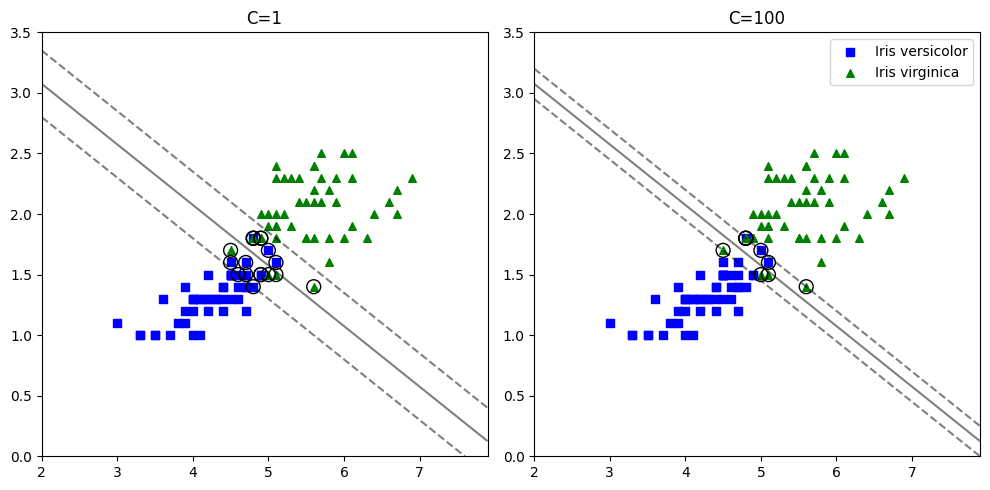

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X_raw = iris['data'][:, (2, 3)]   # petal length, petal width
y_raw = iris['target']            # Iris virginica

mask=(y_raw!=0)                   # remove Iris-Setosa
X = X_raw[mask]
y = y_raw[mask]

y = (y==2).astype(np.float64)     # 0:Iris versicolor, 1:Iris virginica

cmap = {0: 'blue', 1: 'green'}
lbl = {0: 'Iris versicolor', 1: 'Iris virginica'}
mrk = {0: 's', 1: '^'}

plt.figure(figsize=(10, 5))
for i, C in enumerate([1, 100]):
  clf = Pipeline([('scaler', StandardScaler()),
                  ('model', LinearSVC(C=C, loss='hinge', max_iter=int(1e4), random_state=42))])
  clf.fit(X, y)

  decision_function = clf.decision_function(X)
  support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)[0]
  support_vectors = X[support_vector_indices]

  plt.subplot(1, 2, i+1)

  for g in np.unique(y):
    ix = np.where(y==g)
    plt.scatter(X[ix, 0], X[ix, 1], c = cmap[g], label=lbl[g], marker=mrk[g], s=30)

  ax = plt.gca()
  DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
  )
  plt.scatter(
    support_vectors[:, 0],
    support_vectors[:, 1],
    s=100,
    linewidth=1,
    facecolors="none",
    edgecolors="k",
  )
  plt.title("C=" + str(C))

plt.legend()
plt.tight_layout()
plt.show()

## Fit SVC with polynomial kernel

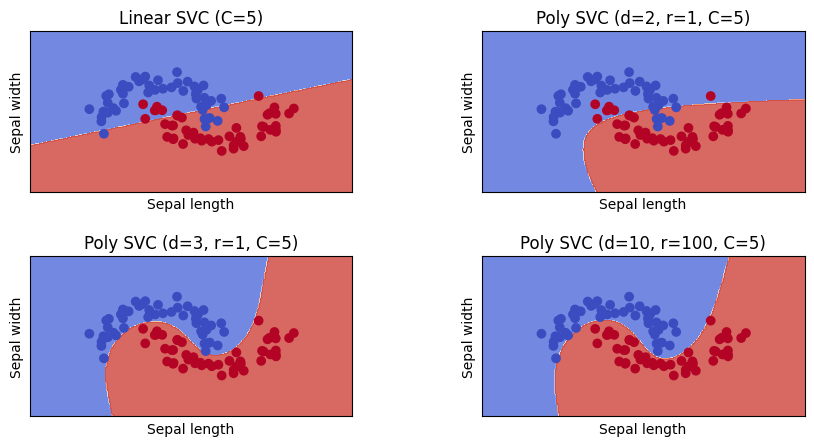

In [ ]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC

X, y = make_moons(n_samples=100, noise=0.15)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 5
models = [SVC(kernel='linear', C=C).fit(X, y),
          SVC(kernel='poly', degree=2, coef0=1, C=C).fit(X, y),
          SVC(kernel='poly', degree=3, coef0=1, C=C).fit(X, y),
          SVC(kernel='poly', degree=10, coef0=100, C=C).fit(X, y)]

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Linear SVC (C=5)',
          'Poly SVC (d=2, r=1, C=5)',
          'Poly SVC (d=3, r=1, C=5)',
          'Poly SVC (d=10, r=100, C=5)',]

plt.figure(figsize=(10, 5))
for i, clf in enumerate(models):
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('X1')
  plt.ylabel('X2')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

plt.show()

## Fit SVC with RBF kernel

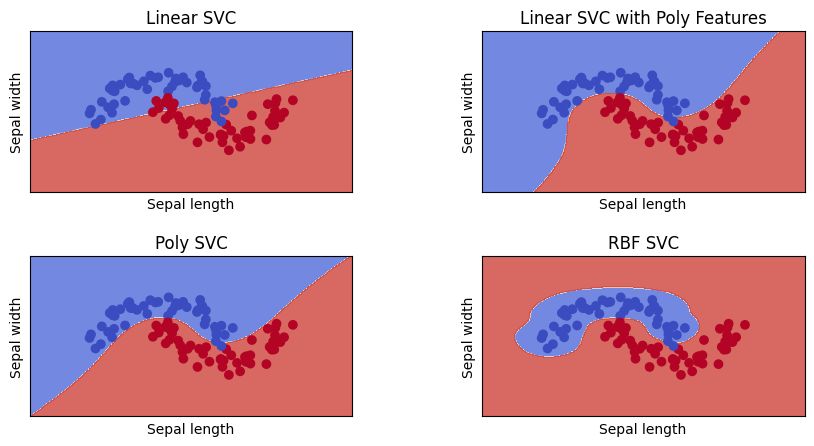

In [ ]:
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVC

X, y = make_moons(n_samples=100, noise=0.15)

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 5
models = [SVC(kernel='linear', C=C),
          SVC(kernel='linear', C=C),
          SVC(kernel='poly', degree=3, coef0=1, C=C),
          SVC(kernel="rbf", gamma=5, C=0.001)]

# create a mesh to plot in
h = .02  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['Linear SVC',
          'Linear SVC with Poly Features',
          'Poly SVC',
          'RBF SVC',]

plt.figure(figsize=(10, 5))
for i, clf_mod in enumerate(models):
  # Plot the decision boundary. For that, we will assign a color to each
  # point in the mesh [x_min, x_max]x[y_min, y_max].
  plt.subplot(2, 2, i + 1)
  plt.subplots_adjust(wspace=0.4, hspace=0.4)

  # add model to pipeline
  if i == 1:
    clf = Pipeline([("poly_features", PolynomialFeatures(degree=3)),
                    ("scaler", StandardScaler()),
                    ("svm_clf", clf_mod)])
  else:
    clf = Pipeline([("scaler", StandardScaler()),
                    ("svm_clf", clf_mod)])

  clf.fit(X, y)

  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

  # Plot also the training points
  plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title(titles[i])

plt.show()

# Challenges

Try out different SVC models on the Rotten Tomatoes movie review sentiment classification problem.

# References

[AIMA] Russell and Norvig, *Artificial Intelligence: A Modern Approach*, 4th ed, 2020

[HML] Géron, *Hands-on Machine Learning with Scikit-Learn*, Keras, and TensorFlow, 2017

[PRML] Bishop, *Pattern Recognition and Machine Learning*, 2006

[Kumar] Kumar, *Support Vector Machine (SVM) Python Example*, https://vitalflux.com/classification-model-svm-classifier-python-example/

[Sampaio] Sampaio, *Understanding SVM Hyperparameters*, https://stackabuse.com/understanding-svm-hyperparameters/